# Item-based Collaborative Filtering Product Recommendation System

In [1]:
#import library to be used in the project
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Read the file and print the first 5 row
user_product_ratings = pd.read_csv(r'C:\Users\Wilson Tan\Downloads\AI assignment\product.csv', names=['userId', 'productId','Rating','timestamp'])
user_product_ratings.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## Data cleansing

In [2]:
#Shape of the data
user_product_ratings.shape

(7824482, 4)

In [3]:
#Extract 100000 data from the dataset(7824482)
user_product_ratings = user_product_ratings.iloc[:100000,0:]

In [4]:
#Drop the unneccessary column
user_product_ratings = user_product_ratings.drop('timestamp', axis=1)

In [5]:
#Shape of the data
user_product_ratings.shape

(100000, 3)

In [6]:
user_product_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  object 
 1   productId  100000 non-null  object 
 2   Rating     100000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


In [7]:
#Check the datatypes
user_product_ratings.dtypes

userId        object
productId     object
Rating       float64
dtype: object

In [8]:
#Check for missing values
print('Number of missing values across columns:')
print(user_product_ratings.isnull().sum())

Number of missing values across columns:
userId       0
productId    0
Rating       0
dtype: int64


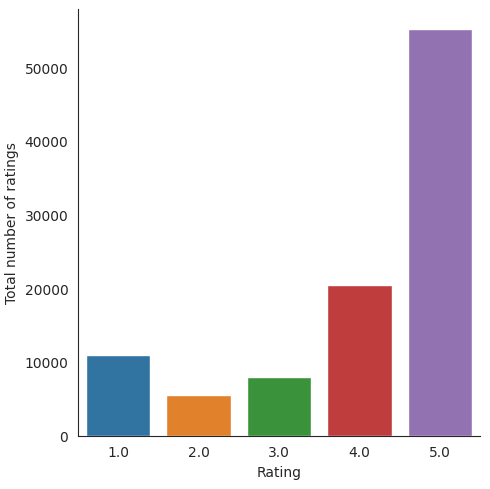

In [9]:
# Check with the ratings distribution
with sns.axes_style('white'):
    g = sns.catplot(x ="Rating", data = user_product_ratings, kind ='count')
    g.set_ylabels("Total number of ratings")

In [10]:
#Print the number of ratings, user and product
print("Total number of ratings  :",user_product_ratings.shape[0])
print("Total number of user     :", len(np.unique(user_product_ratings.userId)))
print("Total number of products :", len(np.unique(user_product_ratings.productId)))

Total number of ratings  : 100000
Total number of user     : 89938
Total number of products : 6918


In [11]:
#Read the json file which contains product name
product_title = pd.read_json(r'C:\Users\Wilson Tan\Downloads\AI assignment\test.json', lines=True)
product_title.head()

,title,main_cat,asin
0,Genuine Geovision 1 Channel 3rd Party NVR IP S...,Camera &amp; Photo,0011300000
1,"Books ""Handbook of Astronomical Image Processi...",Camera &amp; Photo,0043396828
2,One Hot Summer,Books,0060009810
3,Hurray for Hattie Rabbit: Story and pictures (...,Books,0060219602
4,sex.lies.murder.fame.: A Novel,Books,0060786817


In [12]:
#Check for missing values
print('Number of missing values across columns:')
print(product_title.isnull().sum())

Number of missing values across columns:
title       0
main_cat    0
asin        0
dtype: int64


In [13]:
#Rename the column from default column name
product_title.rename(columns = {'asin':'productId'}, inplace = True)
product_title

,title,main_cat,productId
0,Genuine Geovision 1 Channel 3rd Party NVR IP S...,Camera &amp; Photo,0011300000
1,"Books ""Handbook of Astronomical Image Processi...",Camera &amp; Photo,0043396828
2,One Hot Summer,Books,0060009810
3,Hurray for Hattie Rabbit: Story and pictures (...,Books,0060219602
4,sex.lies.murder.fame.: A Novel,Books,0060786817
...,...,...,...
99995,Kingston HyperX Memory 2GB 1066MHz DDR2 PC2-85...,All Electronics,B000NDTBCW
99996,Sylvania LC155SL8 15-Inch LCD HDTV,All Electronics,B000NDRU5W
99997,Sylvania CD202SL8 20-Inch Pure Flat DVD Combo,All Electronics,B000NDRU5M
99998,20IN1 Card Reader USB B Male Win/mac Sd/mmc 3....,All Electronics,B000NDRUDE


In [14]:
#Merge two files based on productId
product_ratings = pd.merge(user_product_ratings, product_title, on='productId')
product_ratings

,userId,productId,Rating,title,main_cat
0,AKM1MP6P0OYPR,0132793040,5.0,Kelby Training DVD: Mastering Blend Modes in A...,Computers
1,A2CX7LUOHB2NDG,0321732944,5.0,Kelby Training DVD: Adobe Photoshop CS5 Crash ...,Computers
2,A1QGNMC6O1VW39,0511189877,5.0,CLIKR-5 Time Warner Cable Remote Control UR5U-...,All Electronics
3,A3J3BRHTDRFJ2G,0511189877,2.0,CLIKR-5 Time Warner Cable Remote Control UR5U-...,All Electronics
4,A2TY0BTJOTENPG,0511189877,5.0,CLIKR-5 Time Warner Cable Remote Control UR5U-...,All Electronics
...,...,...,...,...,...
153740,A29LU2ANHQ8O78,B00005K47X,5.0,Canon EF 50mm f/1.8 II Standard AutoFocus Fixe...,Camera & Photo
153741,AHRBJ3XW7JXW6,B00005K47X,5.0,Canon EF 50mm f/1.8 II Standard AutoFocus Fixe...,Camera & Photo
153742,AHRBJ3XW7JXW6,B00005K47X,5.0,Canon EF 50mm f/1.8 II Standard AutoFocus Fixe...,Camera & Photo
153743,A2ID2FS73N3T83,B00005K47X,5.0,Canon EF 50mm f/1.8 II Standard AutoFocus Fixe...,Camera & Photo


In [15]:
#Check for missing values
print('Number of missing values across columns:')
print(product_ratings.isnull().sum())

Number of missing values across columns:
userId       0
productId    0
Rating       0
title        0
main_cat     0
dtype: int64


In [16]:
#Summarize data to userID and productID with Pivot Table
user_product_matrix = pd.pivot_table(product_ratings, index='userId', columns='title', values ='Rating').fillna(0)
user_product_matrix

title,"""The Arp Atlas of Peculiar Galaxies"", Hardcover Book by Kanipe/Webb",//,"1 X Professional Ultra SanDisk MicroSDXC 32GB (32 Gigabyte) Card for GoPro HERO3 Upgrade is custom formatted and rated for high speed, lossless recording!. (XD UHS-I Class 10 Certified 30MB/sec+)",10 Ivory Leviton 1-Gang Decora GFI GFCI Cover Thermoset Wallplates 80401-I,"100"" Portable Pull Up 4:3 Floor Screen Aluminium Structure Projector Projection",100pcs CD DVD Double Sided Cover Storage Case Plastic Bag Sleeve Envelope Holder,14&quot; Colorful Flower Pattern Hello Kitty Style Laptop Case/Bag(with handles),15' FireWire Cable 6/4,1500mAh BH5X Battery+AC/USB Desktop Charger For Motorola Droid X MB810 Accessories,1617014 PDV1 Portable DVD Player Case,...,"cdProjects SC22MS Steel Case (22/12-CD Capacity, Metallic Silver Finish)","cdProjects VS20 Visor CD Holder Portfolio (20 Capacity, Leather, Black)",i2Go eGo 32MB MP3 Player (Blue),i2Go eGo 64MB MP3 Player (Blue),"iPad Leather Magnetic Carrying Case - Brown (For iPad 1 Only, Not Compatible with iPad 2)",iPod Touch 5th Generation Silicone Skin Case Black,iREZ KritterUSB Webcam PC/Mac (Blue),jWIN JTP10 Caller ID Box,my-Vox Digital Voice Recorder Springboard Module (Graphite),nik Color Efex Pro 2.0 Standard Edition
userId,,,,,,,,,,,,,,,,,,,,,
A001944026UMZ8T3K5QH1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01255851ZO1U93P8RKGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A014623426J5CM7M12MBW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01580702BRW77PSJ9X34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZR8DUVE5L8O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZREGNDJCXP8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZST8OYL5P4Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_product_matrix.shape

(73071, 5457)

In [18]:
#Sort the product with the highest number of rating
total_rate_of_a_product = product_ratings.groupby(by='title')['Rating'].count().sort_values(ascending=False)
total_rate_of_a_product.head()

title
Koss Porta Pro On Ear Headphones with Case, Black / Silver                       4150
Panasonic Headphones On-Ear Lightweight with XBS RP-HT21 (Black &amp; Silver)    3384
Sony MDRV6 Studio Monitor Headphones with CCAW Voice Coil                        3172
Bushnell Powerview Compact Folding Roof Prism Binocular                          2060
Case Logic CDW-32 32 Capacity Classic CD Wallet (Black)                          2030
Name: Rating, dtype: int64

## Start filtering

In [21]:
#One item is selected
users_ratings = user_product_matrix['Koss Porta Pro On Ear Headphones with Case, Black / Silver']
users_ratings.head(10)

userId
A001944026UMZ8T3K5QH1    0.0
A00766851QZZUBOVF4JFT    0.0
A01255851ZO1U93P8RKGE    0.0
A014623426J5CM7M12MBW    0.0
A01580702BRW77PSJ9X34    0.0
A01852072Z7B68UHLI5UG    0.0
A0266076X6KPZ6CCHGVS     0.0
A0293130VTX2ZXA70JQS     0.0
A030530627MK66BD8V4LN    0.0
A03279253KKB83JP34CU     0.0
Name: Koss Porta Pro On Ear Headphones with Case, Black / Silver, dtype: float64

In [22]:
#Calculate the correlation
similar_product = user_product_matrix.corrwith(users_ratings)
similar_product

title
"The Arp Atlas of Peculiar Galaxies", Hardcover Book by Kanipe/Webb                                                                                                                                   -0.000618
//                                                                                                                                                                                                    -0.000618
1 X Professional Ultra SanDisk MicroSDXC 32GB (32 Gigabyte) Card for GoPro HERO3 Upgrade is custom formatted and rated for high speed, lossless recording!. (XD UHS-I Class 10 Certified 30MB/sec+)   -0.000874
10 Ivory Leviton 1-Gang Decora GFI GFCI Cover Thermoset Wallplates 80401-I                                                                                                                            -0.000618
100" Portable Pull Up 4:3 Floor Screen Aluminium Structure Projector Projection                                                                                   

In [23]:
# Create a dataframe
similar_product = pd.DataFrame(similar_product, columns = ['Correlation'])
similar_product.head(10)

,Correlation
title,
"""The Arp Atlas of Peculiar Galaxies"", Hardcover Book by Kanipe/Webb",-0.000618
//,-0.000618
"1 X Professional Ultra SanDisk MicroSDXC 32GB (32 Gigabyte) Card for GoPro HERO3 Upgrade is custom formatted and rated for high speed, lossless recording!. (XD UHS-I Class 10 Certified 30MB/sec+)",-0.000874
10 Ivory Leviton 1-Gang Decora GFI GFCI Cover Thermoset Wallplates 80401-I,-0.000618
"100"" Portable Pull Up 4:3 Floor Screen Aluminium Structure Projector Projection",-0.000618
100pcs CD DVD Double Sided Cover Storage Case Plastic Bag Sleeve Envelope Holder,-0.000618
14&quot; Colorful Flower Pattern Hello Kitty Style Laptop Case/Bag(with handles),-0.000618
15' FireWire Cable 6/4,-0.001289
1500mAh BH5X Battery+AC/USB Desktop Charger For Motorola Droid X MB810 Accessories,-0.001178


In [24]:
#Sort the product with correlation descendingly
similar_product.sort_values(by = 'Correlation', ascending = False).head(10)

,Correlation
title,
"Koss Porta Pro On Ear Headphones with Case, Black / Silver",1.000000
"Premium 6 Foot High Speed HDMI Cable for your Sharp Aquos LED-LCD HDTV ! Supports: 1080p-2160p, 4K, 3D, Deep Color, TrueHD, CL3, and 800Hz technologies.",0.023813
Koss SportaPro Stereo Headphones,0.021189
Pine Technology 2SM200C+ D'Music Portable MP3-CD Player,0.016303
Imation SuperDisk 120MB Parallel Port External Drive,0.012771
Panasonic SLS362C Portable CD Player Car Kit with Remote,0.012121
Minolta Freedom Zoom Supreme EX 35mm Camera,0.012114
Barbie Polaroid I-Zone Instant Pocket Camera,0.011321
Brother 3/4 Inch x 26.2 Feet Black on White Tape with Super Strong Adhesive (TZS241),0.008498


In [25]:
df_rating = pd.DataFrame(product_ratings.groupby('title')['Rating'].count())

In [26]:
recommend_product = similar_product.join(df_rating['Rating']).sort_values(by = 'Correlation', ascending = False)
recommend_product

,Correlation,Rating
title,,
"Koss Porta Pro On Ear Headphones with Case, Black / Silver",1.000000,4150
"Premium 6 Foot High Speed HDMI Cable for your Sharp Aquos LED-LCD HDTV ! Supports: 1080p-2160p, 4K, 3D, Deep Color, TrueHD, CL3, and 800Hz technologies.",0.023813,1
Koss SportaPro Stereo Headphones,0.021189,418
Pine Technology 2SM200C+ D'Music Portable MP3-CD Player,0.016303,8
Imation SuperDisk 120MB Parallel Port External Drive,0.012771,6
...,...,...
Panasonic Headphones On-Ear Lightweight with XBS RP-HT21 (Black &amp; Silver),-0.017951,3384
Cisco-Linksys BEFSR41 EtherFast Cable/DSL Router with 4-Port 10/100 Switch,-0.018448,2012
Bushnell Powerview Compact Folding Roof Prism Binocular,-0.018641,2060


In [27]:
# Recommend product that has more than 50 ratings to increase the accuracy 
recommend_product_2 = recommend_product[recommend_product['Rating'] > 50].sort_values(by = 'Correlation', ascending = False)
recommend_product_2.head(20)

,Correlation,Rating
title,,
"Koss Porta Pro On Ear Headphones with Case, Black / Silver",1.000000,4150
Koss SportaPro Stereo Headphones,0.021189,418
Belkin USB 4-Port Hub with 6FT Cable/Power Supply,0.002462,112
NETGEAR ME102 - Wireless access point - Ethernet,0.001527,58
Kensington TurboBall Trackball (PC/USB Mac),0.001043,56
Sharp MDSR60S Minidisc Player/Recorder,0.000562,80
Yamaha YSTMS30W 3-Piece Computer Speakers,0.000544,62
Koss VC20 Volume Control,0.000489,860
Jensen JF25 Stereo Headphones (Discontinued by Manufacturer),0.000221,76
